In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:

#Column in Dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
#Show data types and null value each column
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Menampilkan 10 baris pertama
diabetes_df.isnull().head(10)
     

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [6]:

#Checking if there is null value
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:

#Checking if there is zero value

#replace 0 value with NaN
diabetes_df_copy = diabetes_df.copy(deep = True) #deep = True -> Buat salinan indeks dan data dalam dataframe
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())
     

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [9]:
# Fill null values with median
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].median())
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].median())
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median())
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median())
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median())


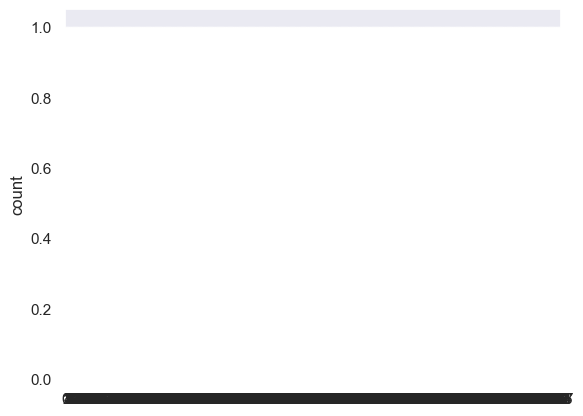

Outcome
0    500
1    268
Name: count, dtype: int64


In [25]:
#Counting 1 and 0 Value in Outcome column
sns.countplot(diabetes_df_copy['Outcome']) 
plt.show()

#membuat bar plot perbandingan jumlah value
print(diabetes_df_copy.Outcome.value_counts()) #menampilkan jumlah value 0 dan 1
     

In [14]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = diabetes_df_copy[(diabetes_df_copy['Outcome']==0)] # semua data yang value outcome nya = 0
df_minority = diabetes_df_copy[(diabetes_df_copy['Outcome']==1)] # semua data yang value outcome nya = 1
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 n_samples= 500, # to match majority class, menyamakan jumlah value 1 dengan 0
                                 random_state=0)  # reproducible results, random state 0 is better than 42
                                                  #Random state = Mengontrol pengacakan yang diterapkan ke data agar hasil yang didapatkan tetap sama
# Combine majority class with upsampled minority class
diabetes_df_copy2 = pd.concat([df_minority_upsampled, df_majority]) #menggabungkan Outcome 1 (minority) yang sudah di upsample dengan Outcome 0 (majority)
     

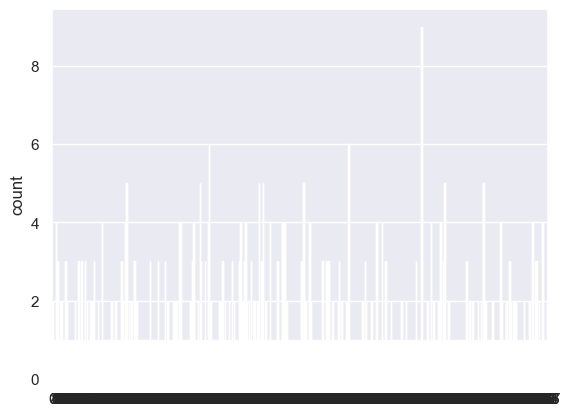

Outcome
1    500
0    500
Name: count, dtype: int64


In [24]:
#Counting 1 and 0 Value in Outcome column
sns.countplot(diabetes_df_copy2['Outcome'])
plt.show()

print(diabetes_df_copy2.Outcome.value_counts())
     

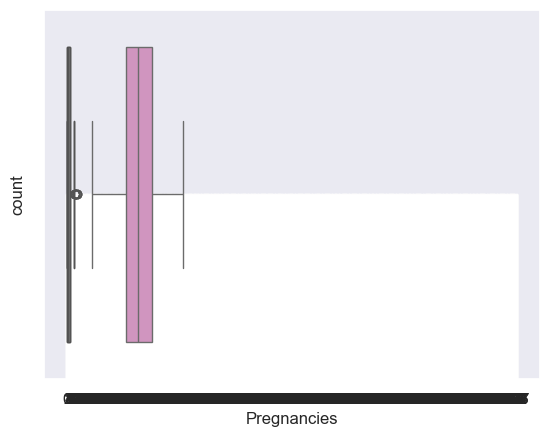

In [20]:
sns.boxplot(x=diabetes_df_copy2["Pregnancies"])
plt.show()


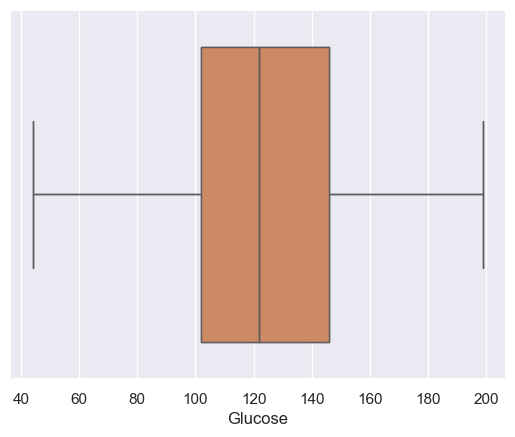

In [22]:
sns.boxplot(x=diabetes_df_copy2["Glucose"])
plt.show()


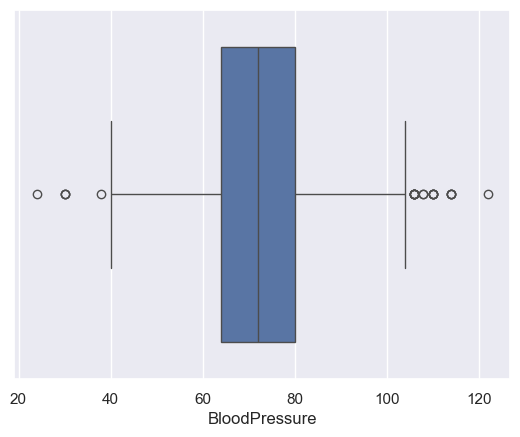

In [26]:
sns.boxplot(x=diabetes_df_copy2["BloodPressure"])
plt.show()

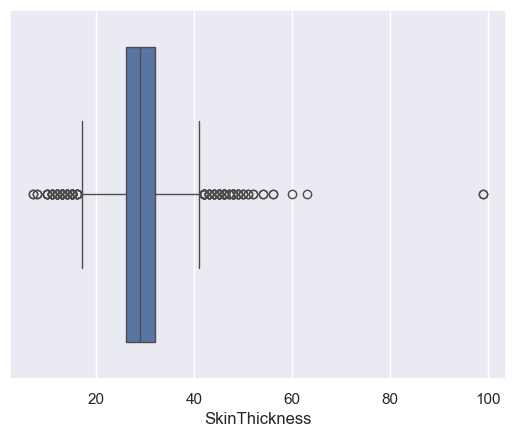

In [27]:
sns.boxplot(x=diabetes_df_copy2["SkinThickness"])
plt.show()

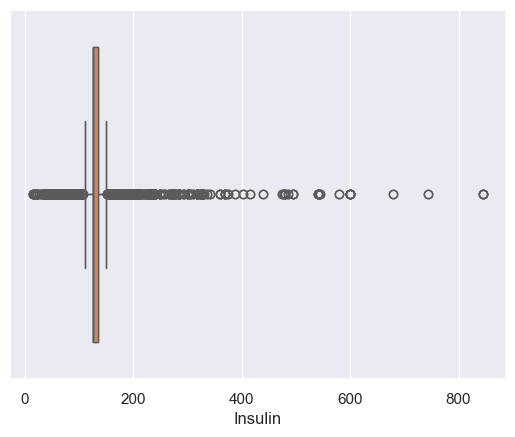

In [30]:
sns.boxplot(x=diabetes_df_copy2["Insulin"])
plt.show()

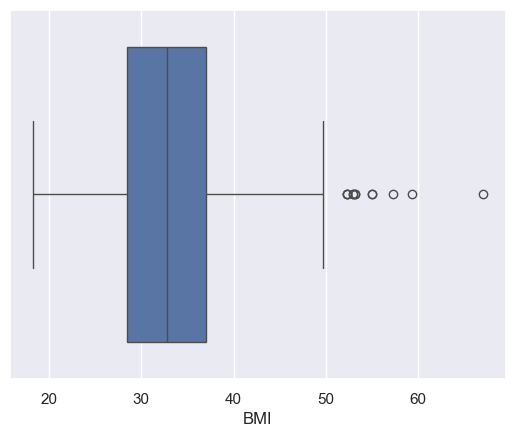

In [31]:
sns.boxplot(x=diabetes_df_copy2["BMI"])
plt.show()

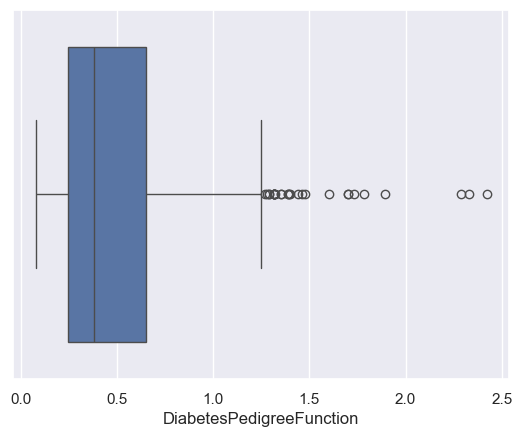

In [33]:
sns.boxplot(x=diabetes_df_copy2["DiabetesPedigreeFunction"])
plt.show()

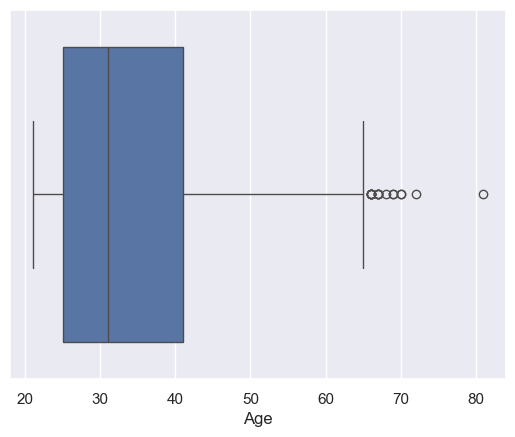

In [34]:
sns.boxplot(x=diabetes_df_copy2["Age"])
plt.show()

In [35]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["Pregnancies"])

Outliers: [17]


In [36]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["BloodPressure"])

Outliers: [110.0, 114.0, 110.0, 110.0, 114.0, 114.0, 30.0, 110.0, 114.0, 30.0, 30.0, 122.0, 110.0, 24.0]


In [37]:

out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["SkinThickness"])

Outliers: [99.0, 56.0, 56.0, 99.0, 63.0, 60.0]


In [38]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["Insulin"])

Outliers: [478.0, 600.0, 495.0, 540.0, 600.0, 543.0, 600.0, 543.0, 846.0, 495.0, 600.0, 540.0, 846.0, 543.0, 474.0, 579.0, 478.0, 485.0, 744.0, 680.0, 545.0, 415.0, 480.0, 440.0]


In [39]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["BMI"])
     

Outliers: [67.1, 53.2, 53.2, 55.0, 59.4, 55.0, 57.3]


In [40]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["Age"])

Outliers: [70, 70, 72, 81]


In [41]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["DiabetesPedigreeFunction"])

Outliers: [1.893, 2.288, 2.42, 1.781, 2.329, 1.476, 1.731, 1.6, 1.699, 1.698, 1.461]


In [42]:
import scipy.stats as stats
z = np.abs(stats.zscore(diabetes_df_copy2))
data_clean = diabetes_df_copy2[(z<3).all(axis = 1)] #print all of rows that have z<3 (z score below 3)
data_clean.shape

(941, 9)

In [43]:
#Cleaned Outliers data using Z Scores
data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
451,2,134.0,70.0,29.0,125.0,28.9,0.542,23,1
128,1,117.0,88.0,24.0,145.0,34.5,0.403,40,1
306,10,161.0,68.0,23.0,132.0,25.5,0.326,47,1
542,10,90.0,85.0,32.0,125.0,34.9,0.825,56,1
730,3,130.0,78.0,23.0,79.0,28.4,0.323,34,1
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [44]:
diabetes_df_copy2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
451,2,134.0,70.0,29.0,125.0,28.9,0.542,23,1
128,1,117.0,88.0,24.0,145.0,34.5,0.403,40,1
306,10,161.0,68.0,23.0,132.0,25.5,0.326,47,1
542,10,90.0,85.0,32.0,125.0,34.9,0.825,56,1
730,3,130.0,78.0,23.0,79.0,28.4,0.323,34,1
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [45]:
#Print rows dalam dataframe diabetes_df_copy2 yang not isin(tidak didalam) dataframe data_clean
#lambang (~) menandakan NOT
diabetes_df_copy2[~diabetes_df_copy2.index.isin(data_clean.index)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,1
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52,1
45,0,180.0,66.0,39.0,125.0,42.0,1.893,25,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
691,13,158.0,114.0,29.0,125.0,42.3,0.257,44,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
655,2,155.0,52.0,27.0,540.0,38.7,0.240,25,1
579,2,197.0,70.0,99.0,125.0,34.7,0.575,62,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


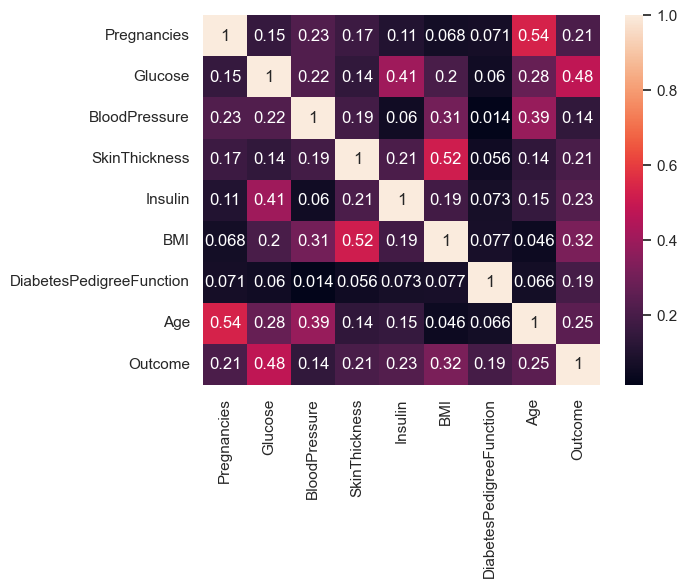

In [46]:

sns.heatmap(data_clean.corr(), annot=True)
plt.show()

In [48]:
X = data_clean.drop('Outcome', axis=1) 
y = data_clean['Outcome'] 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0) #split test 10% dan train sisa dari test yaitu 90%
     

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0) 
dtree.fit(X_train, y_train)
     

DecisionTreeClassifier(random_state=0)

In [51]:
from sklearn.metrics import confusion_matrix
     

In [52]:

y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))
     

F-1 Score :  0.8952380952380953
Precision Score :  0.8392857142857143
Recall Score :  0.9591836734693877


In [53]:
cm = confusion_matrix(y_test, y_pred) #memasukkan y_test dan y_pred
plt.figure(figsize=(5,5)) #ukuran plotting heatmap
#settingan heatmap, 
#data=cm -> menggunakan variabel cm, 
#linewidths=.5 -> Lebar garis yang akan membagi setiap sel, 
#annot=True -> menampilkan value setiap sel,
#cmap = 'Blues' -> color space = Blue 
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues') 
plt.ylabel('Actual label') #Mendefinisikan sumbu y untuk Actual label
plt.xlabel('Predicted label') #Mendefinisikan sumbu x untuk predicted label
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test)) #melakukan kalkulasi score akurasi, {0} berfungsi untuk menampilkan angka akurasi
plt.title(all_sample_title, size = 15) #setting ukuran tulisan "Accuracy Score: 0.8"

Text(0.5, 1.0, 'Accuracy Score: 0.8842105263157894')

In [54]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
     

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:

y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))
     


F-1 Score :  0.8952380952380953
Precision Score :  0.8392857142857143
Recall Score :  0.9591836734693877


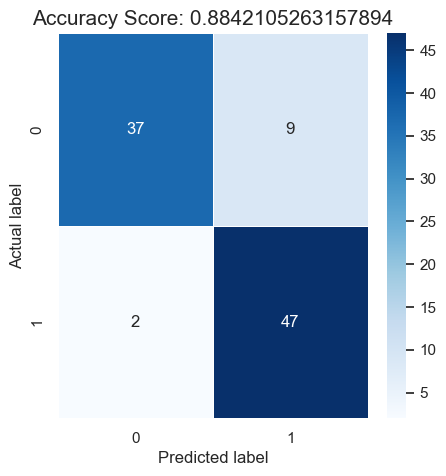

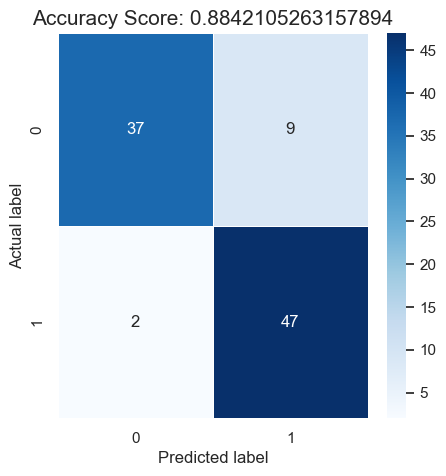

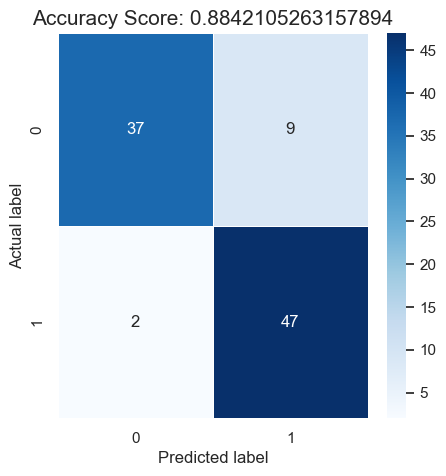

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test)) 
plt.title(all_sample_title, size = 15)
plt.show()
     

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [60]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [61]:
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))
     

F-1 Score :  0.88268156424581
Precision Score :  0.8681318681318682
Recall Score :  0.8977272727272727


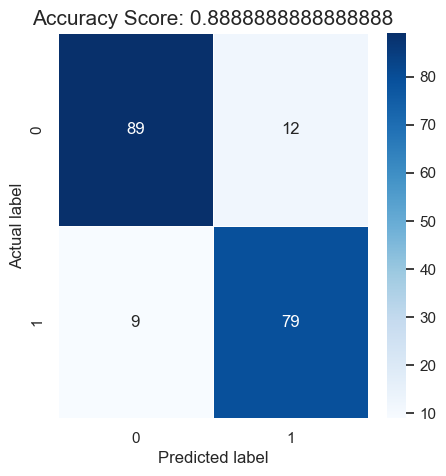

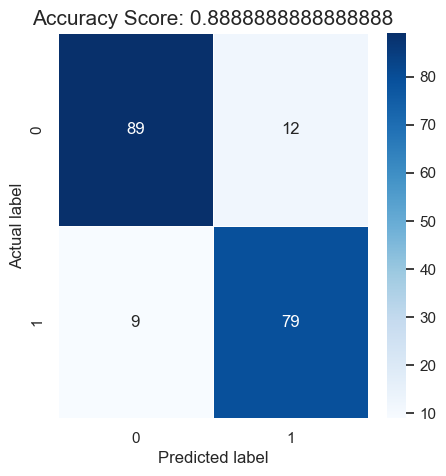

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()

In [64]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))
     

F-1 Score :  0.8723404255319149
Precision Score :  0.82
Recall Score :  0.9318181818181818


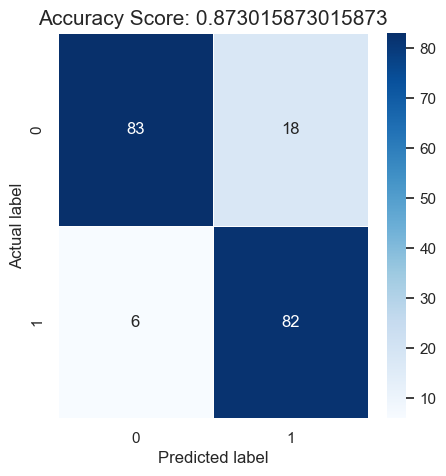

In [66]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()

In [67]:
#test size 30% and train size 70%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
     


DecisionTreeClassifier(random_state=0)

In [69]:
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8263888888888888
Precision Score :  0.815068493150685
Recall Score :  0.8380281690140845


In [70]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.823321554770318')

In [71]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8680555555555556
Precision Score :  0.8561643835616438
Recall Score :  0.8802816901408451


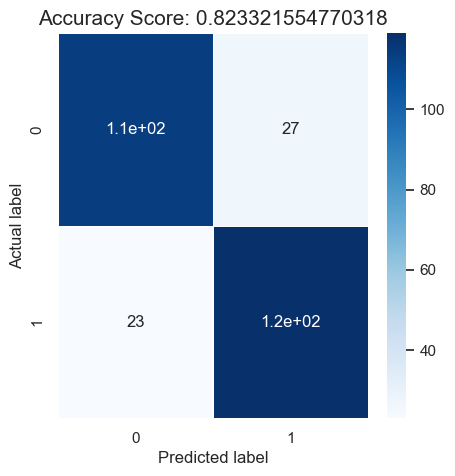

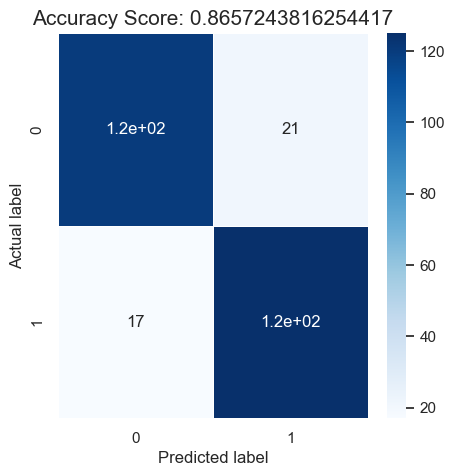

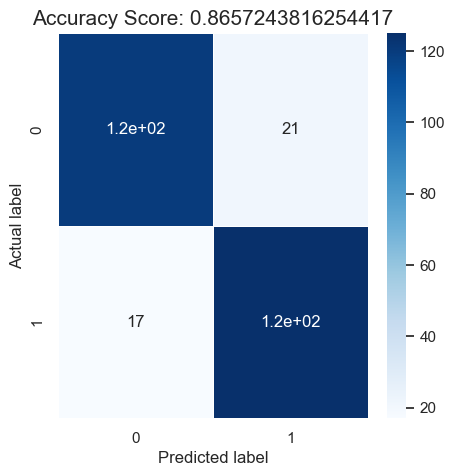

In [74]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()

In [75]:
#test size 40% and train size 60%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
     

In [76]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [77]:
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))
     

F-1 Score :  0.80306905370844
Precision Score :  0.785
Recall Score :  0.8219895287958116


In [78]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
     

Text(0.5, 1.0, 'Accuracy Score: 0.7957559681697612')

In [79]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8081841432225064
Precision Score :  0.79
Recall Score :  0.8272251308900523


In [81]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.8010610079575596')